In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import warnings

In [36]:


warnings.filterwarnings("ignore")

In [37]:
# Load dataset
df = pd.read_csv("dataset.csv")  # Adjust filename if needed

In [38]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# prompt: drop columns will nulls above or equal 25 %

# Calculate the percentage of null values in each column
null_percentage = df.isnull().sum() / len(df) * 100

# Identify columns with null values above or equal to 25%
columns_to_drop = null_percentage[null_percentage >= 25].index

# Drop the identified columns
df = df.drop(columns=columns_to_drop)


In [40]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN


In [41]:
# prompt: show unique values in disease column count total number of unique values

unique_diseases = df['Disease'].unique()
print(unique_diseases)
print(f"Total number of unique diseases: {len(unique_diseases)}")


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
Total number of unique diseases: 41


In [42]:
# Step 1: Data Preprocessing
symptom_cols = [col for col in df.columns if col.startswith("Symptom_")]
df[symptom_cols] = df[symptom_cols].fillna("")

In [43]:
# Clean and standardize symptom names
for col in symptom_cols:
    df[col] = df[col].str.strip().str.lower()

In [44]:
# Combine all symptoms into a list (remove empty)
df["All_Symptoms"] = df[symptom_cols].apply(lambda x: sorted(set(x) - {""}), axis=1)

In [45]:

# Encode symptoms with MultiLabelBinarizer
mlb = MultiLabelBinarizer()
symptom_features = mlb.fit_transform(df["All_Symptoms"])
symptom_df = pd.DataFrame(symptom_features, columns=mlb.classes_)

In [46]:
# Encode target (Disease)
label_encoder = LabelEncoder()
df["Disease_Encoded"] = label_encoder.fit_transform(df["Disease"])

In [47]:

# Features and target
X = symptom_df
y = df["Disease_Encoded"]

1. Pie Chart — Top 10 Most Common Diseases


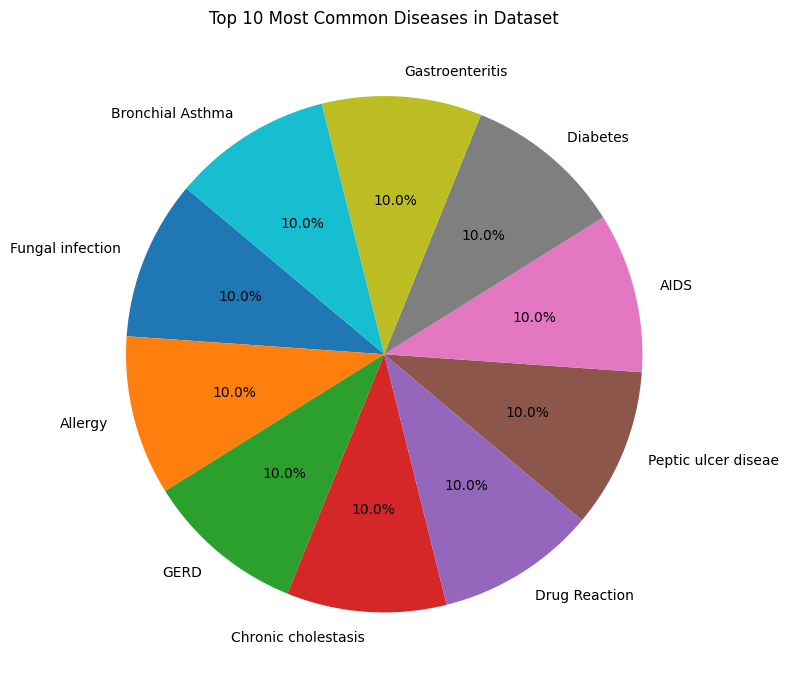

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("dataset.csv")
top_diseases = df["Disease"].value_counts().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_diseases.values, labels=top_diseases.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Most Common Diseases in Dataset")
plt.tight_layout()
plt.show()


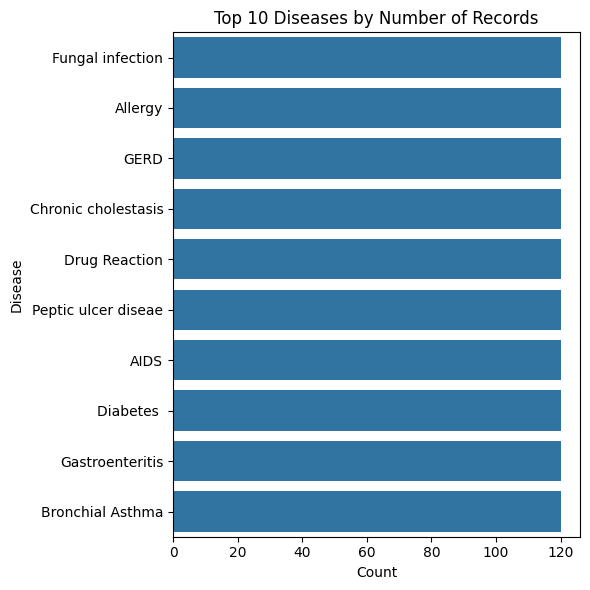

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("dataset.csv")

plt.figure(figsize=(6, 6))
sns.countplot(data=df, y="Disease", order=df["Disease"].value_counts().index[:10])
plt.title("Top 10 Diseases by Number of Records")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.tight_layout()
plt.show()


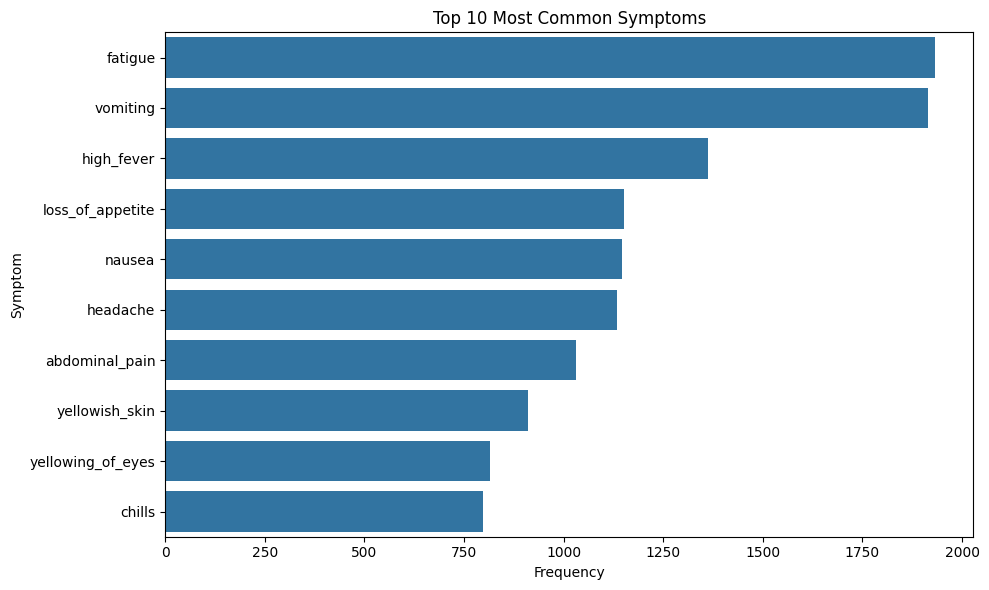

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")
symptom_cols = [col for col in df.columns if col.startswith("Symptom_")]
df[symptom_cols] = df[symptom_cols].fillna("")
for col in symptom_cols:
    df[col] = df[col].str.strip().str.lower()

# Melt symptoms into long format
df_long = pd.melt(df, id_vars=["Disease"], value_vars=symptom_cols, var_name="Symptom#", value_name="Symptom")
df_long = df_long[df_long["Symptom"] != ""]

# Count top 20
top_symptoms = df_long["Symptom"].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_symptoms.index, x=top_symptoms.values, orient='h')
plt.title("Top 10 Most Common Symptoms")
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()


Accuracy: 0.9980

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00      1

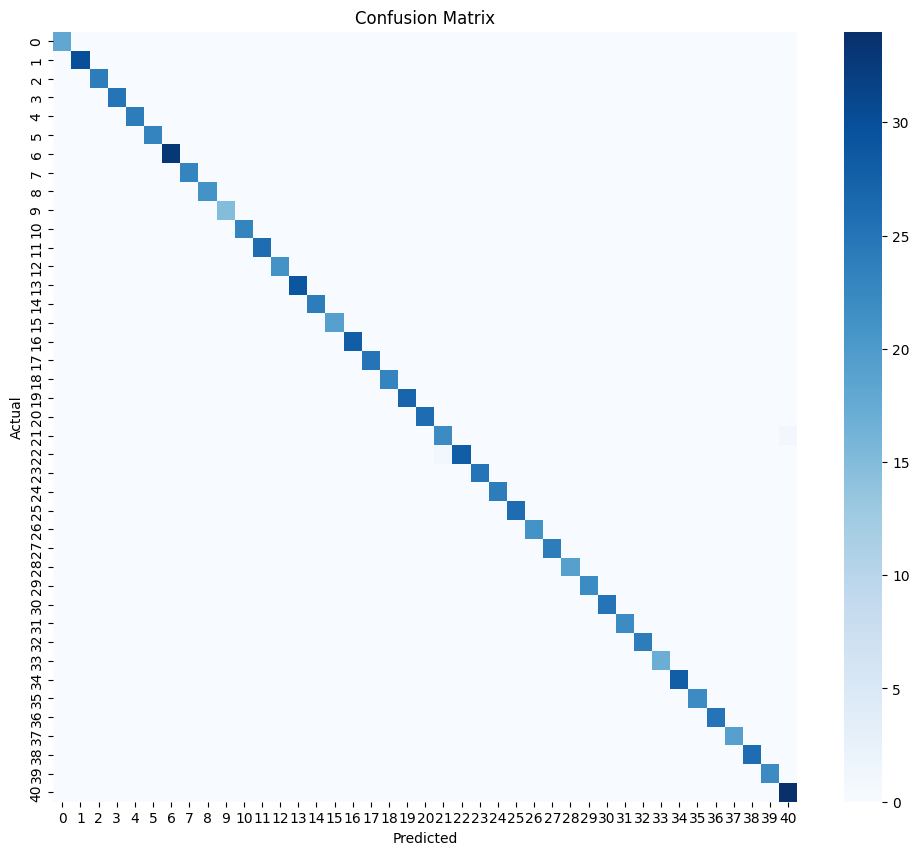

In [51]:
# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Model Training (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Prediction
y_pred = model.predict(X_test)

# Step 5: Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Confusion Matrix:")
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=False, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression Accuracy: 0.9979674796747967
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common 

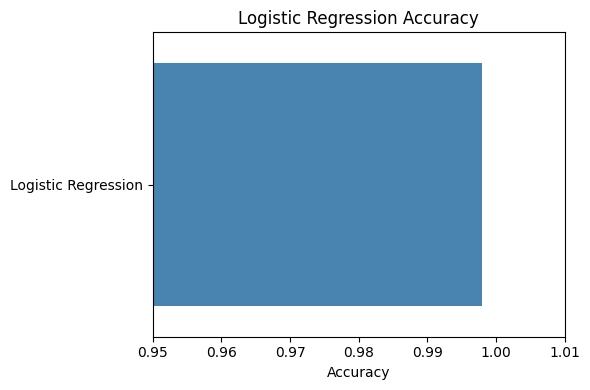

In [52]:
# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)
print("Classification Report:\n", classification_report(y_test, lr_pred, target_names=label_encoder.classes_))

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=[lr_acc], y=["Logistic Regression"], palette="Blues_d")
plt.xlim(0.95, 1.01)
plt.xlabel("Accuracy")
plt.title("Logistic Regression Accuracy")
plt.tight_layout()
plt.show()

In [53]:
# 2. SVM (Linear Kernel)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
print("\nSVM Accuracy:", svm_acc)
print("Classification Report:\n", classification_report(y_test, svm_pred, target_names=label_encoder.classes_))



SVM Accuracy: 0.9979674796747967
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00

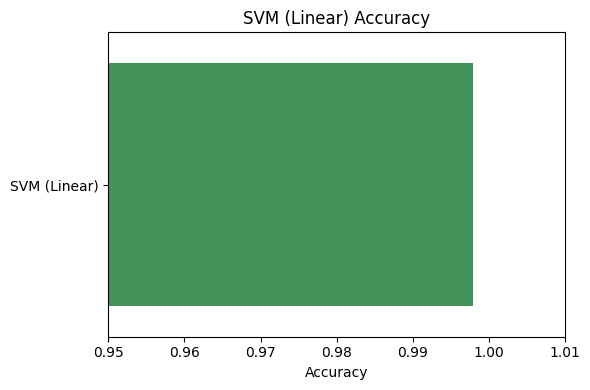

In [54]:
svm_acc = accuracy_score(y_test, svm_pred)

plt.figure(figsize=(6, 4))
sns.barplot(x=[svm_acc], y=["SVM (Linear)"], palette="Greens_d")
plt.xlim(0.95, 1.01)
plt.xlabel("Accuracy")
plt.title("SVM (Linear) Accuracy")
plt.tight_layout()
plt.show()


In [55]:
# 3. Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print("\nNaive Bayes Accuracy:", nb_acc)
print("Classification Report:\n", classification_report(y_test, nb_pred, target_names=label_encoder.classes_))


Naive Bayes Accuracy: 0.9979674796747967
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold   

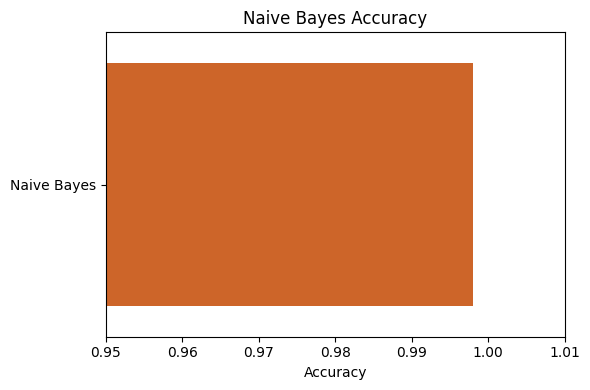

In [56]:
nb_acc = accuracy_score(y_test, nb_pred)

plt.figure(figsize=(6, 4))
sns.barplot(x=[nb_acc], y=["Naive Bayes"], palette="Oranges_d")
plt.xlim(0.95, 1.01)
plt.xlabel("Accuracy")
plt.title("Naive Bayes Accuracy")
plt.tight_layout()
plt.show()


In [57]:
# 4. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("\nDecision Tree Accuracy:", dt_acc)
print("Classification Report:\n", classification_report(y_test, dt_pred, target_names=label_encoder.classes_))


Decision Tree Accuracy: 0.9979674796747967
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold 

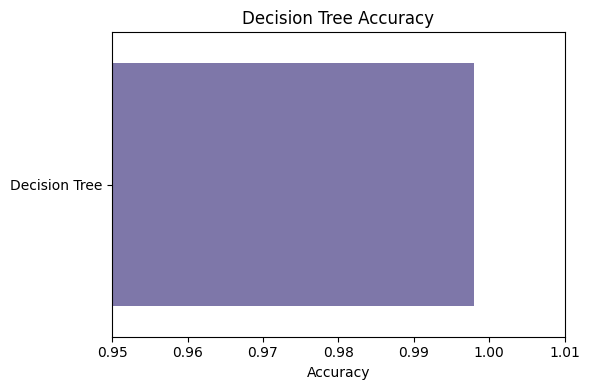

In [58]:
dt_acc = accuracy_score(y_test, dt_pred)

plt.figure(figsize=(6, 4))
sns.barplot(x=[dt_acc], y=["Decision Tree"], palette="Purples_d")
plt.xlim(0.95, 1.01)
plt.xlabel("Accuracy")
plt.title("Decision Tree Accuracy")
plt.tight_layout()
plt.show()


In [59]:
# --- MODEL 5: XGBoost ---
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("\n🔹 XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred, target_names=label_encoder.classes_))


🔹 XGBoost Accuracy: 0.9979674796747967
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold     

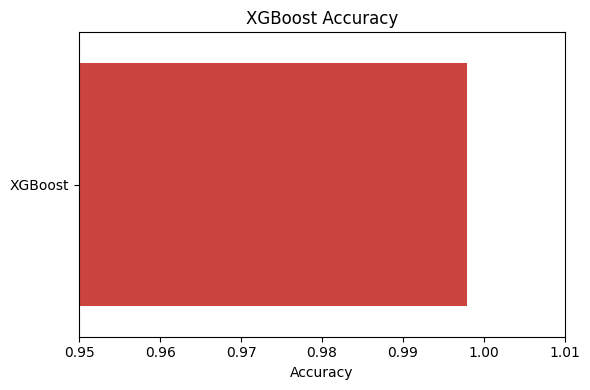

In [60]:
xgb_acc = accuracy_score(y_test, xgb_pred)

plt.figure(figsize=(6, 4))
sns.barplot(x=[xgb_acc], y=["XGBoost"], palette="Reds_d")
plt.xlim(0.95, 1.01)
plt.xlabel("Accuracy")
plt.title("XGBoost Accuracy")
plt.tight_layout()
plt.show()


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter space
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Results
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate
from sklearn.metrics import classification_report, accuracy_score
y_best_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_best_pred))
print("Classification Report:\n", classification_report(y_test, y_best_pred, target_names=label_encoder.classes_))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': False}
Accuracy: 0.9979674796747967
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicke

In [62]:
import joblib
import os

# Create directory for saving models
os.makedirs("saved_models", exist_ok=True)

# Save each model
joblib.dump(lr_model, "saved_models/logistic_regression.pkl")
joblib.dump(svm_model, "saved_models/svm_linear.pkl")
joblib.dump(nb_model, "saved_models/naive_bayes.pkl")
joblib.dump(dt_model, "saved_models/decision_tree.pkl")
joblib.dump(xgb_model, "saved_models/xgboost.pkl")

# Also save encoders used in preprocessing
joblib.dump(label_encoder, "saved_models/label_encoder.pkl")
joblib.dump(mlb, "saved_models/symptom_encoder.pkl")


['saved_models/symptom_encoder.pkl']